<H1> Telecom Churn - Case Study 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#read data
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# functions block

def get_rows_cols(telecom):
    no_of_rows = telecom.shape[0]
    no_of_columns = telecom.shape[1]
    print("Number of rows in the dataset : " + str(no_of_rows) + "\nNumber of columns in the dataset: " + str(no_of_columns))    

def null_percent(telecom):
    return 100*telecom.isnull().sum()/len(telecom)

def percent_nan_sincol(telecom,colname):
    num_of_nan = telecom[colname].isnull().sum()
    per_nan = num_of_nan*100/telecom.shape[0]
    return per_nan
 

In [4]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# backup of data
data_backup = telecom.copy()

In [7]:
#create column name list 
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
num_cols = [column for column in telecom.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

<H3> Handling Missing Values</H3>

In [8]:
null_percent(telecom)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

<H2> Impute Missing Values</H2>

<H3> a)  Imputing with zeroes</H3>

In [9]:
100*telecom['total_rech_data_6'].isnull().sum()/len(telecom)

74.84674846748467

In [10]:
# recharge columns
print(telecom.columns.values)

['mobile_number' 'circle_id' 'loc_og_t2o_mou' 'std_og_t2o_mou'
 'loc_ic_t2o_mou' 'last_date_of_month_6' 'last_date_of_month_7'
 'last_date_of_month_8' 'last_date_of_month_9' 'arpu_6' 'arpu_7' 'arpu_8'
 'arpu_9' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'onnet_mou_9'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'offnet_mou_9'
 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_ic_mou_9'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'roam_og_mou_9'
 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2t_mou_9' 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7'
 'loc_og_t2m_mou_8' 'loc_og_t2m_mou_9' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2f_mou_9'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8'
 'loc_og_t2c_mou_9' 'loc_og_mou_6' 'loc_og_mou_7' 'loc_og_mou_8'
 'loc_og_mou_9' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2t_mou_9' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2m_mou_9' 'std_og_t2f_mou_6

In [11]:
# recharge columns

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [12]:
#it is observed that the recharge data and the recharge value are missing together which means the customer didnt recharge

telecom.loc[telecom.total_rech_data_6.isnull() & telecom.date_of_last_rech_data_6.isnull(), ['total_rech_data_6','date_of_last_rech_data_6']].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


hence it means, column total_rech_data_n and date _of_last_rech_n are correlated to each other.We can delete the date columns. 

In the recharge columns where minimum value is 1, we can impute missing values with 0 it means customer didnt recharge their number that month. 

In [14]:
imputation = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
               'max_rech_data_8','max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']


In [15]:
telecom[imputation] = telecom[imputation].apply(lambda x: x.fillna(0))

In [16]:
percent_list = [col+' : '+str(percent_nan_sincol(telecom,col)) for col in imputation]
percent_list


['total_rech_data_6 : 0.0',
 'total_rech_data_7 : 0.0',
 'total_rech_data_8 : 0.0',
 'total_rech_data_9 : 0.0',
 'max_rech_data_6 : 0.0',
 'max_rech_data_7 : 0.0',
 'max_rech_data_8 : 0.0',
 'max_rech_data_9 : 0.0',
 'av_rech_amt_data_6 : 0.0',
 'av_rech_amt_data_7 : 0.0',
 'av_rech_amt_data_8 : 0.0',
 'av_rech_amt_data_9 : 0.0']

After imputing with 0, there is no missing values in recharge columns where minimim value is 1.

In [17]:
telecom = telecom.drop(id_cols + date_cols, axis=1)
get_rows_cols(telecom)

Number of rows in the dataset : 99999
Number of columns in the dataset: 212


<H3> b)  Replace NaN values in categorical variables </H3>

Will replace missing values in categorical column by '-1' where '-1' will be a new category  

In [18]:
telecom[cat_cols] = telecom[cat_cols].apply(lambda x: x.fillna(-1))

In [19]:
percent_list = [col+' : '+str(percent_nan_sincol(telecom,col)) for col in cat_cols]
percent_list

['night_pck_user_6 : 0.0',
 'night_pck_user_7 : 0.0',
 'night_pck_user_8 : 0.0',
 'night_pck_user_9 : 0.0',
 'fb_user_6 : 0.0',
 'fb_user_7 : 0.0',
 'fb_user_8 : 0.0',
 'fb_user_9 : 0.0']

After imputing with '-1' their is no missing values in categorical columns

<H3>c) Drop variable with more than a given threshold of missing values</H3>

In [20]:
THRESHOLD = 0.7

include_cols = list(telecom.apply(lambda column: True if column.isnull().sum()/telecom.shape[0] < THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telecom.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [21]:
#drop columns
initial_cols = telecom.shape[1]
telecom = telecom.loc[:, include_cols]
dropped_cols = initial_cols - telecom.shape[1] 
print("{0} columns dropped.".format(dropped_cols))

16 columns dropped.


<H3> d) Imputing using Iterative Method</H3>

In [22]:
telecom_columns = telecom.columns

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
ii = IterativeImputer()
telecom_clean = pd.DataFrame(ii.fit_transform(telecom))
telecom_clean.columns = telecom_columns
telecom_clean.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-94.993138,-82.297617,0.00,-107.626176,143.92044,133.540482,0.00,113.492423,28.592969,12.00071,0.00,8.072744,33.263627,12.326591,0.00,1.45877,-99.931951,-117.363396,0.00,-120.133817,93.343638,91.394223,0.00,90.448656,3.750273,3.799416,0.00,3.663072,2.461554,-2.528847,0.00,-0.115273,-2.924015,-22.174751,0.00,-26.021554,30.603171,32.897705,0.00,34.064617,87.374886,90.804609,0.00,86.214419,1.076186,1.148038,0.00,1.0622,0.0,0.0,0.0,0.0,119.042198,124.862314,0.00,121.33356,-120.387236,-107.700282,0.0,-99.744219,3.910262,4.973542,0.00,4.403258,0.443014,0.047604,0.0,0.049487,0.00,0.00,0.00,0.00,-58.899697,-63.908948,0.16,-58.73472,107.483355,107.115622,4.13,106.153133,12.075851,12.605515,1.15,12.173214,60.582555,55.777086,5.44,59.587191,-23.052918,-23.202306,0.00,-22.251641,20.721387,21.646418,0.00,19.617615,2.157144,2.224777,0.00,2.176535,0.0,0.0,0.0,0.0,-0.1799,0.667566,0.00,-0.457238,0.00,0.00,5.44,0.00,-67.601729,-64.48126,0.0,-67.995768,7.070286,7.406037,0.0,8.015057,0.853714,1.011907,0.0,1.017006,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.

In [25]:
telecom = pd.DataFrame(telecom_clean, columns=telecom_columns)
null_percent(telecom)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

after imputing with Iterative Imputer their is no missing value left.

<H2> Filter high-value customers</H2>

<H4>Calculate total data recharge amount</H4>

In [115]:
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [116]:
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

In [117]:
#calculate average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

In [118]:
#recharge amount at 70th percentile
print('Recharge amount at 70th percentile: {0}'.format(telecom.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [119]:
#Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filtered = telecom.loc[telecom.av_amt_data_6_7 >=telecom.av_amt_data_6_7.quantile(0.7),:]


In [120]:
#telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(30001, 201)

In [121]:
# delete variables created to filter high-value customers
telecom_filtered = telecom_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_filtered.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

<H3>Derive Churn</H3>

In [122]:
#Calculate total incoming and outgoing minutes of usage
telecom_filtered['total_calls_mou_9'] = telecom_filtered.total_ic_mou_9 + telecom_filtered.total_og_mou_9

In [123]:
# Calculate 2g and 3g data consumption 
telecom_filtered['total_internet_mb_9'] =  telecom_filtered.vol_2g_mb_9 + telecom_filtered.vol_3g_mb_9

In [124]:
#Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned 
telecom_filtered['churn'] = telecom_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [125]:
# delete derived variables
telecom_filtered = telecom_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [126]:
# change data type to category
telecom_filtered.churn = telecom_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_filtered.churn.value_counts()*100/telecom_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


<H3> Calculate difference between 8th and previous months</H3>

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month

In [127]:
telecom_filtered['arpu_diff'] = telecom_filtered.arpu_8 - ((telecom_filtered.arpu_6 + telecom_filtered.arpu_7)/2)

telecom_filtered['onnet_mou_diff'] = telecom_filtered.onnet_mou_8 - ((telecom_filtered.onnet_mou_6 + telecom_filtered.onnet_mou_7)/2)

telecom_filtered['offnet_mou_diff'] = telecom_filtered.offnet_mou_8 - ((telecom_filtered.offnet_mou_6 + telecom_filtered.offnet_mou_7)/2)

telecom_filtered['roam_ic_mou_diff'] = telecom_filtered.roam_ic_mou_8 - ((telecom_filtered.roam_ic_mou_6 + telecom_filtered.roam_ic_mou_7)/2)

telecom_filtered['roam_og_mou_diff'] = telecom_filtered.roam_og_mou_8 - ((telecom_filtered.roam_og_mou_6 + telecom_filtered.roam_og_mou_7)/2)

telecom_filtered['loc_og_mou_diff'] = telecom_filtered.loc_og_mou_8 - ((telecom_filtered.loc_og_mou_6 + telecom_filtered.loc_og_mou_7)/2)

telecom_filtered['std_og_mou_diff'] = telecom_filtered.std_og_mou_8 - ((telecom_filtered.std_og_mou_6 + telecom_filtered.std_og_mou_7)/2)

telecom_filtered['isd_og_mou_diff'] = telecom_filtered.isd_og_mou_8 - ((telecom_filtered.isd_og_mou_6 + telecom_filtered.isd_og_mou_7)/2)

telecom_filtered['spl_og_mou_diff'] = telecom_filtered.spl_og_mou_8 - ((telecom_filtered.spl_og_mou_6 + telecom_filtered.spl_og_mou_7)/2)

telecom_filtered['total_og_mou_diff'] = telecom_filtered.total_og_mou_8 - ((telecom_filtered.total_og_mou_6 + telecom_filtered.total_og_mou_7)/2)

telecom_filtered['loc_ic_mou_diff'] = telecom_filtered.loc_ic_mou_8 - ((telecom_filtered.loc_ic_mou_6 + telecom_filtered.loc_ic_mou_7)/2)

telecom_filtered['std_ic_mou_diff'] = telecom_filtered.std_ic_mou_8 - ((telecom_filtered.std_ic_mou_6 + telecom_filtered.std_ic_mou_7)/2)

telecom_filtered['isd_ic_mou_diff'] = telecom_filtered.isd_ic_mou_8 - ((telecom_filtered.isd_ic_mou_6 + telecom_filtered.isd_ic_mou_7)/2)

telecom_filtered['spl_ic_mou_diff'] = telecom_filtered.spl_ic_mou_8 - ((telecom_filtered.spl_ic_mou_6 + telecom_filtered.spl_ic_mou_7)/2)

telecom_filtered['total_ic_mou_diff'] = telecom_filtered.total_ic_mou_8 - ((telecom_filtered.total_ic_mou_6 + telecom_filtered.total_ic_mou_7)/2)

telecom_filtered['total_rech_num_diff'] = telecom_filtered.total_rech_num_8 - ((telecom_filtered.total_rech_num_6 + telecom_filtered.total_rech_num_7)/2)

telecom_filtered['total_rech_amt_diff'] = telecom_filtered.total_rech_amt_8 - ((telecom_filtered.total_rech_amt_6 + telecom_filtered.total_rech_amt_7)/2)

telecom_filtered['max_rech_amt_diff'] = telecom_filtered.max_rech_amt_8 - ((telecom_filtered.max_rech_amt_6 + telecom_filtered.max_rech_amt_7)/2)

telecom_filtered['total_rech_data_diff'] = telecom_filtered.total_rech_data_8 - ((telecom_filtered.total_rech_data_6 + telecom_filtered.total_rech_data_7)/2)

telecom_filtered['max_rech_data_diff'] = telecom_filtered.max_rech_data_8 - ((telecom_filtered.max_rech_data_6 + telecom_filtered.max_rech_data_7)/2)

telecom_filtered['av_rech_amt_data_diff'] = telecom_filtered.av_rech_amt_data_8 - ((telecom_filtered.av_rech_amt_data_6 + telecom_filtered.av_rech_amt_data_7)/2)

telecom_filtered['vol_2g_mb_diff'] = telecom_filtered.vol_2g_mb_8 - ((telecom_filtered.vol_2g_mb_6 + telecom_filtered.vol_2g_mb_7)/2)

telecom_filtered['vol_3g_mb_diff'] = telecom_filtered.vol_3g_mb_8 - ((telecom_filtered.vol_3g_mb_6 + telecom_filtered.vol_3g_mb_7)/2)

In [128]:
# let's look at summary of one of the difference variables
telecom_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

<H5> delete columns that belong to the churn month(9th month)</H5>

In [129]:
telecom_filtered = telecom_filtered.filter(regex='[^9]$', axis=1)
telecom_filtered.shape

(30001, 173)

In [150]:
# extract all names that end with 9
col_9_names = telecom.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in telecom_filtered.columns if col not in cat_cols]
#cat_cols.drop(cat_cols['telecom'])
#cat_cols.remove('churn')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

<H3>Visualise data</H3>

In [151]:
telecom_filtered[num_cols] = telecom_filtered[num_cols].apply(pd.to_numeric)
telecom_filtered[cat_cols] = telecom_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)


In [152]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

<H4>Univariate EDA</H4>

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


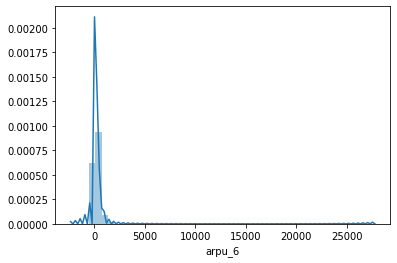

In [153]:
univariate(telecom.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


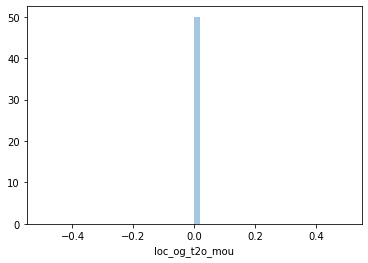

In [154]:
univariate(telecom.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


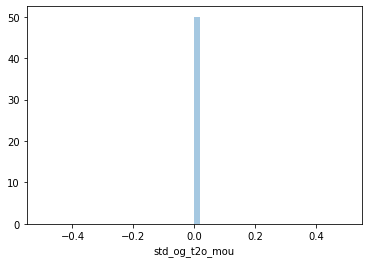

In [155]:
univariate(telecom.std_og_t2o_mou)

count    99999.000000
mean       121.503676
std        304.393653
min       -680.618888
25%          4.090000
50%         28.040000
75%        106.760000
max      10752.560000
Name: onnet_mou_8, dtype: float64


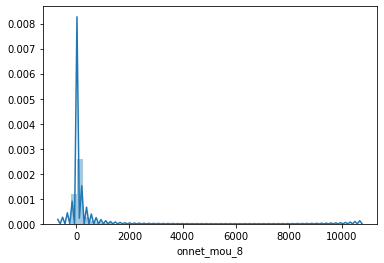

In [156]:
univariate(telecom.onnet_mou_8)

count    99999.000000
mean       184.521432
std        307.438933
min        -35.457331
25%         31.230000
50%        101.110000
75%        202.870000
max      10310.760000
Name: offnet_mou_9, dtype: float64


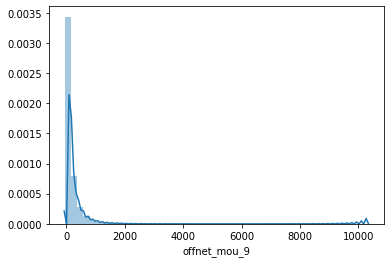

In [157]:
univariate(telecom.offnet_mou_9)

Variables are very skewed towards the left

<H3>Bivariate EDA</H3>

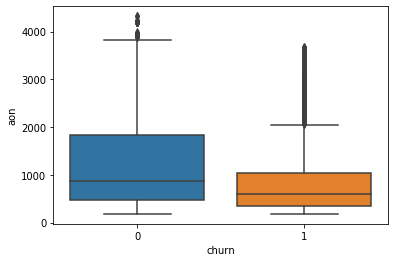

In [158]:
bivariate(telecom_filtered.churn, telecom_filtered.aon)

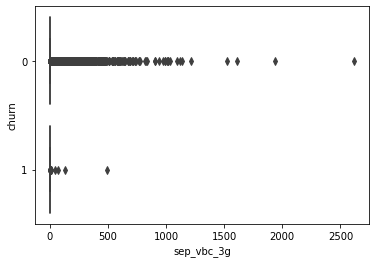

In [159]:
bivariate(telecom_filtered.sep_vbc_3g, telecom_filtered.churn)

In [160]:
pd.crosstab(telecom_filtered.churn, telecom_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [161]:
pd.crosstab(telecom_filtered.churn, telecom_filtered.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


<H4>capping Outliers

In [162]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [163]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [164]:
# cap outliers in the numeric columns
telecom_filtered[num_cols] = telecom_filtered[num_cols].apply(cap_outliers, axis=0)

<H2>Modelling</H2>

<H3> a) Making predictions</H3>

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

<H4>Preprocessing Data</H4>

In [166]:
telecom_filtered['churn'] = pd.to_numeric(telecom_filtered['churn'])

<H4> Train Test Split

In [167]:
# divide data into train and test
X = telecom_filtered.drop("churn", axis = 1)
y = telecom_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [168]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 172)
(22500,)
(7501, 172)
(7501,)


<H4>Aggregating the categorical columns</H4>

In [169]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64
fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64
fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64
fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64


In [170]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

<H2>PCA</H2>

In [171]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [172]:
pca.fit(X_train, y_train)
churn_pca = pca.fit_transform(X_train)

In [174]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.60
1       21.01
2       26.91
3       31.93
4       36.03
5       39.73
6       42.49
7       45.08
8       47.40
9       49.65
10      51.72
11      53.64
12      55.47
13      57.21
14      58.90
15      60.54
16      62.14
17      63.56
18      64.89
19      66.21
20      67.50
21      68.68
22      69.84
23      70.92
24      71.95
25      72.92
26      73.88
27      74.82
28      75.73
29      76.60
30      77.42
31      78.23
32      79.01
33      79.78
34      80.52
35      81.24
36      81.94
37      82.62
38      83.25
39      83.81
40      84.37
41      84.90
42      85.44
43      85.96
44      86.46
45      86.94
46      87.41
47      87.86
48      88.28
49      88.68
50      89.06
51      89.43
52      89.79
53      90.13
54      90.47
55      90.80
56      91.13
57      91.45
58      91.76
59      92.06
60      92.35
61      92.64
62      92.91
63      93.19
64      93.45
65      93.70
66      93.95
67      94.18
68      94.40
69      94.62
70      94.82
71    

~60 components explain 90% variance
~80 components explain 95% variance

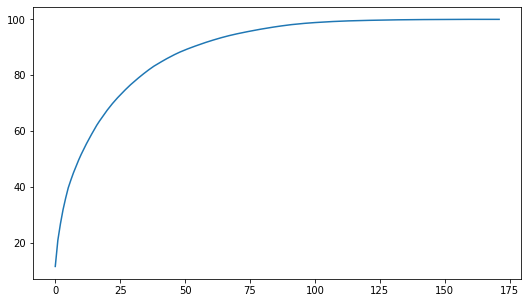

In [175]:
# plot feature variance"
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

<H2> PCA and Logistic Regression</H2>

In [176]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [177]:
# fit model
pipeline.fit(X_train,y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8437777777777777

<H4>Evaluate on test data</H4>

In [178]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5803 1088]
 [  95  515]]
Sensitivity: 	0.84
Specificity: 	0.84
AUC:    	 0.91


<H3>Hyperparameter tuning - PCA and Logistic Regression</H3>

In [179]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [180]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [181]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   37.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [182]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.301481,0.105492,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.579825,0.183643,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,1.670167,0.159758,0.048629,0.002652,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.898394,0.890435,0.899426,0.916554,0.895922,0.900146,0.008775,9
3,2.031131,0.102899,0.059259,0.016174,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.898640,0.893873,0.902378,0.916871,0.899731,0.902299,0.007789,1
4,1.340384,0.100422,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,1.807132,0.105505,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,1.629254,0.132322,0.044620,0.010607,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.899143,0.890856,0.899056,0.915641,0.895061,0.899951,0.008417,12
7,2.278491,0.265773,0.052741,0.012343,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.898503,0.894738,0.902593,0.915817,0.899704,0.902271,0.007227,2
8,1.205422,0.137442,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,1.494497,0.051404,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [183]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9022986394340968
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [184]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5998  893]
 [ 118  492]]
Sensitivity: 	0.81
Specificity: 	0.87
AUC:    	 0.92


<H3> Random Forest</H3>

In [185]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [186]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [187]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9291059420893258
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [188]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6789  102]
 [ 304  306]]
Sensitivity: 	0.5
Specificity: 	0.99
AUC:    	 0.94


poor sensitivity. The best model is PCA along with Logistic Regression

<H3> Choosing best Feature

In [189]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [190]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.4s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [191]:
# OOB score
rf_model.oob_score_

0.9456444444444444

In [192]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6805   86]
 [ 318  292]]
Sensitivity: 	0.48
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


<H3> Feature Importance

In [194]:
# predictors
features = telecom_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.664984
1,loc_ic_mou_8,3.842413
2,roam_og_mou_8,3.776459
3,loc_og_mou_8,3.150003
4,total_og_mou_8,3.020689
5,total_rech_amt_diff,2.812066
6,loc_ic_t2t_mou_8,2.718256
7,roam_ic_mou_8,2.411136
8,last_day_rch_amt_8,2.291664
9,loc_og_t2t_mou_8,2.000158


<H3> Extracting top 30 features

In [195]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

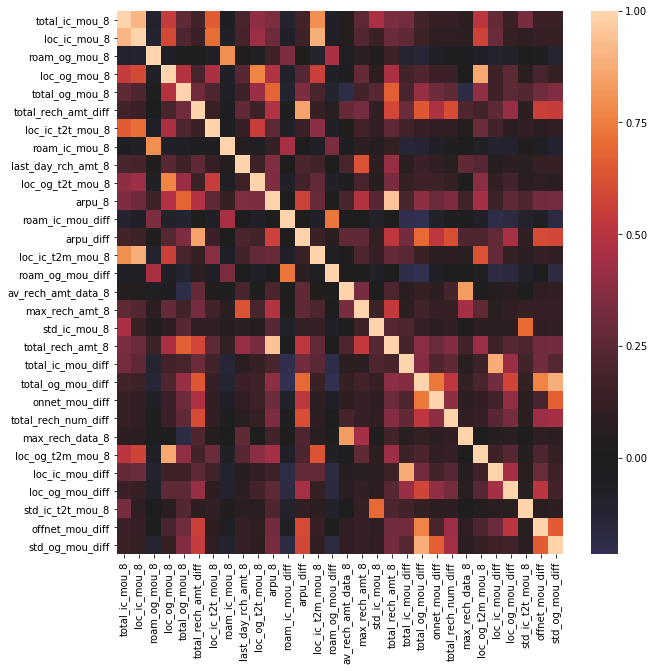

In [198]:
#plot feature correlation

plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0)

In [199]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [200]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [201]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  65 out of  80 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [202]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8818897568985797
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [203]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5840 1051]
 [ 126  484]]
Sensitivity: 	0.79
Specificity: 	0.85
ROC:    	 0.88


<H4> Extract the intercept and the coefficients from the logistic model

In [204]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [205]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [206]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [207]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.542221,-0.734072,-0.699481,-2.062348,0.173934,-0.025184,0.382295,-0.039905,-0.748593,1.527314



<H3>Business Insights</H3>

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.

